In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Problem Statement

In [2]:
features= pd.read_csv("D:/program session/project/Final Project/Features_data_set.csv")
sales= pd.read_csv("D:/program session/project/Final Project/sales_data_set.csv")
stores= pd.read_csv("D:/program session/project/Final Project/stores_data_set.csv")


In [3]:
features.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [4]:
sales.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True


In [5]:
stores.head(3)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


### Basic Analysis of Dataset from Problem Statement and Features

#### 1.we should merge the data set 
#### 2.it is a supervised learning problem - We are predicting target variable
#### 3.From target varible we can clearly understand it is a Regression problem
#### 4.From target varible is Weekly_Sales

# Merge Data set

#### Data set has been common columns is there [store,date,IsHoliday] so we should Go for Each By Each Merge

In [6]:
df_Merge = stores.merge(right =features, on = 'Store')

In [7]:
df_Merge.head(2)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [8]:
df= df_Merge.merge(right = sales, on = ['Store', 'Date', 'IsHoliday'])

In [9]:
df.tail(2)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
421568,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48
421569,45,B,118221,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,98,1076.80


In [10]:
df.describe()

,Store,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,44.260317,15981.258123
std,12.785297,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,30.492054,22711.183519
min,1.000000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,1.000000,-4988.940000
25%,11.000000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,18.000000,2079.650000
50%,22.000000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,37.000000,7612.030000
75%,33.000000,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,74.000000,20205.852500
max,45.000000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,99.000000,693099.360000


# Data Cleaning

## Missing Value

In [11]:
df.isnull().sum()

Store                0
Type                 0
Size                 0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Dept                 0
Weekly_Sales         0
dtype: int64

So, the entire line of code is assigning the DataFrame with these specific columns, but with **NaN values replaced by 0**. This is often done to ensure numerical calculations or analysis on the**DataFrame won't be affected by missing values**.

In [12]:
df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0)


In [13]:
df.isnull().sum()

Store           0
Type            0
Size            0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Dept            0
Weekly_Sales    0
dtype: int64

In [14]:
df.head(2)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,A,151315,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50
1,1,A,151315,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27


## Duplicates

In [15]:
df.duplicated().sum()

0

No duplicates inside the data set so we sholud go next

## Wrong Format

In [16]:
df.dtypes

Store             int64
Type             object
Size              int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
Dept              int64
Weekly_Sales    float64
dtype: object

All Formate Is Good Only Change For **DATE** format it's not object 

In [17]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [18]:
df.tail(2)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
421568,45,B,118221,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48
421569,45,B,118221,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,98,1076.80


## Text Error

In [19]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['Type']

In [20]:
bool_data_cols = [var for var in df.columns if df[var].dtype == 'bool']
bool_data_cols

['IsHoliday']

In [21]:
df['Type'].value_counts()

Type
A    215478
B    163495
C     42597
Name: count, dtype: int64

In [22]:
df['IsHoliday'].value_counts()

IsHoliday
False    391909
True      29661
Name: count, dtype: int64

No Text Error in this Data set

## Outlier

In [23]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Weekly_Sales']

In [24]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['Store', 'Size', 'Dept']

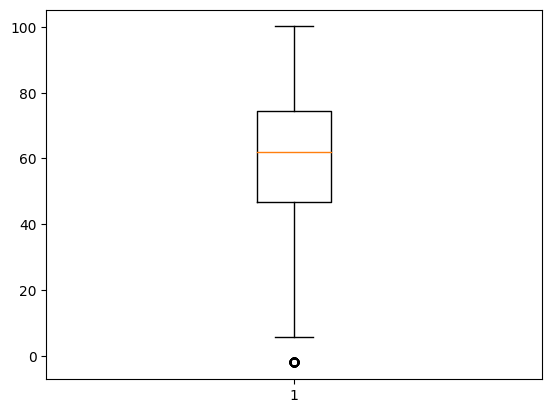

In [25]:
# Creating plot
plt.boxplot(df['Temperature'] )

# show plot
plt.show()

In [26]:
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound , upper_bound

(5.279999999999994, 115.68)

In [27]:
df.Temperature = df.Temperature.clip(lower_bound , upper_bound)

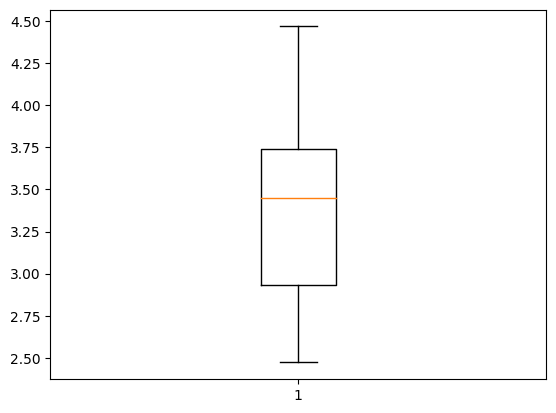

In [28]:
# Fuel_Price

plt.boxplot(df['Fuel_Price'] )

# show plot
plt.show()

In [29]:
Q1 = df['Fuel_Price'].quantile(0.25)
Q3 = df['Fuel_Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound , upper_bound

(1.7254999999999996, 4.9455)

In [30]:
df.Fuel_Price = df.Fuel_Price.clip(lower_bound , upper_bound)

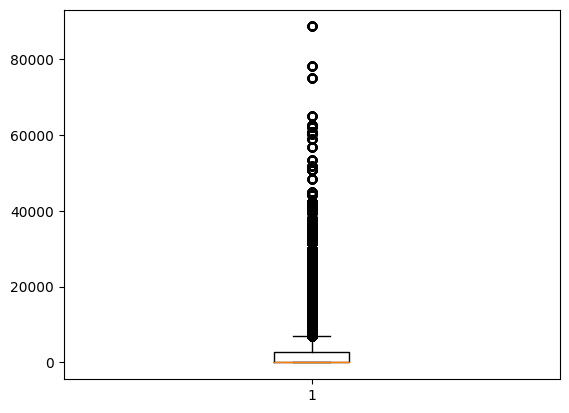

In [31]:
#MarkDown1
plt.boxplot(df['MarkDown1'] )

# show plot
plt.show()

In [32]:
Q1 = df['MarkDown1'].quantile(0.25)
Q3 = df['MarkDown1'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound , upper_bound

(-4213.575000000001, 7022.625000000001)

In [33]:
df.MarkDown1 = df.MarkDown1.clip(lower_bound , upper_bound)

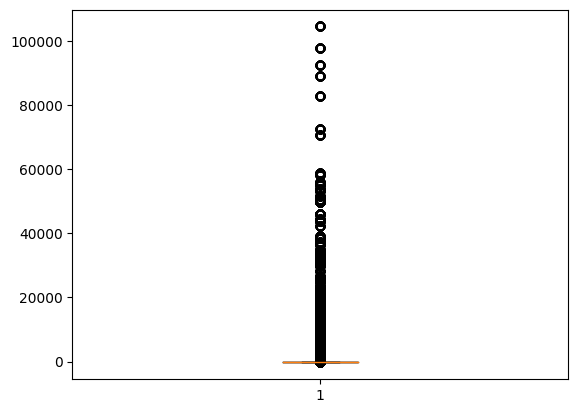

In [34]:
# MarkDown2
plt.boxplot(df['MarkDown2'] )

# show plot
plt.show()

In [35]:
Q1 = df['MarkDown2'].quantile(0.25)
Q3 = df['MarkDown2'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound , upper_bound

(-3.3000000000000003, 5.5)

In [36]:
df.MarkDown2 = df.MarkDown2.clip(lower_bound , upper_bound)

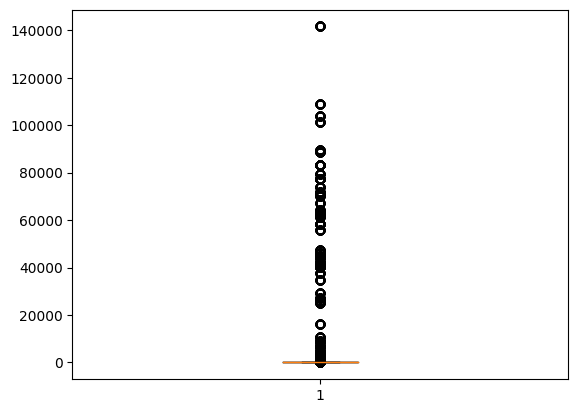

In [37]:
#MarkDown3
plt.boxplot(df['MarkDown3'] )

# show plot
plt.show()

In [38]:
Q1 = df['MarkDown3'].quantile(0.25)
Q3 = df['MarkDown3'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound , upper_bound

(-6.8100000000000005, 11.350000000000001)

In [39]:
df.MarkDown3 = df.MarkDown3.clip(lower_bound , upper_bound)

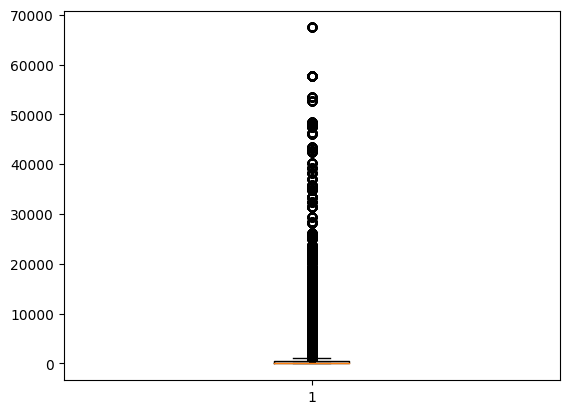

In [40]:
#MarkDown4
plt.boxplot(df['MarkDown4'] )

# show plot
plt.show()

In [41]:
Q1 = df['MarkDown4'].quantile(0.25)
Q3 = df['MarkDown4'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound , upper_bound

(-637.9350000000001, 1063.2250000000001)

In [42]:
df.MarkDown4 = df.MarkDown4.clip(lower_bound , upper_bound)

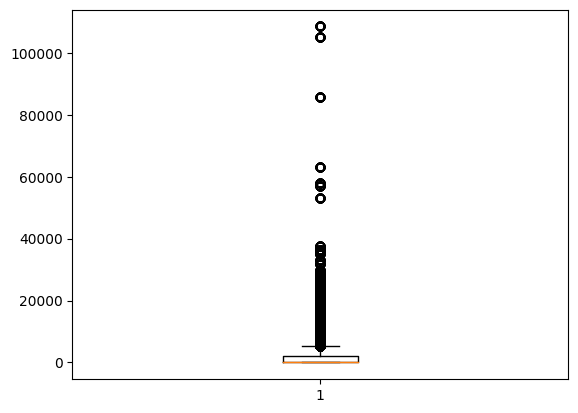

In [43]:
#MarkDown5
plt.boxplot(df['MarkDown5'] )

# show plot
plt.show()

In [44]:
Q1 = df['MarkDown5'].quantile(0.25)
Q3 = df['MarkDown5'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound , upper_bound

(-3252.06, 5420.1)

In [45]:
df.MarkDown5 = df.MarkDown5.clip(lower_bound , upper_bound)

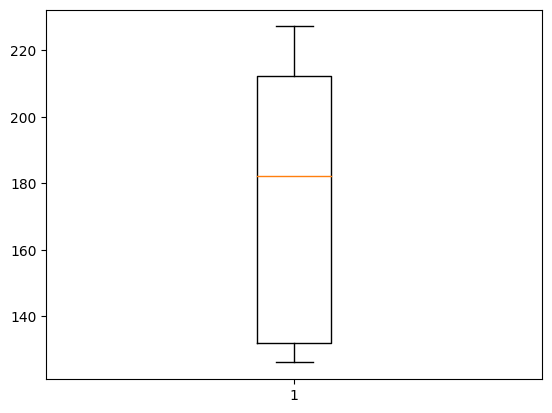

In [46]:
#CPI
plt.boxplot(df['CPI'] )

# show plot
plt.show()

In [47]:
Q1 = df['CPI'].quantile(0.25)
Q3 = df['CPI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound , upper_bound

(11.431177550000001, 333.00848195000003)

In [48]:
df.CPI = df.CPI.clip(lower_bound , upper_bound)

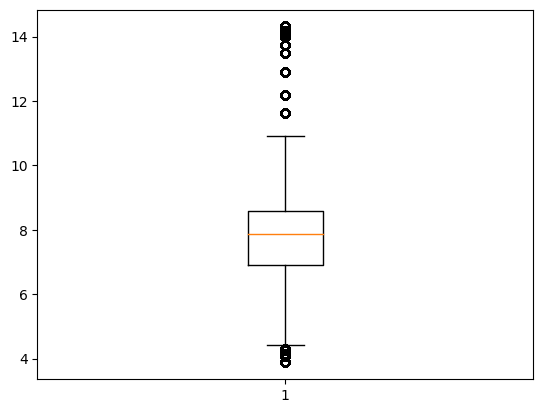

In [49]:
#Unemployment
plt.boxplot(df['Unemployment'] )

# show plot
plt.show()

In [50]:
Q1 = df['Unemployment'].quantile(0.25)
Q3 = df['Unemployment'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound , upper_bound

(4.369500000000001, 11.093499999999999)

In [51]:
df.Unemployment = df.Unemployment.clip(lower_bound , upper_bound)

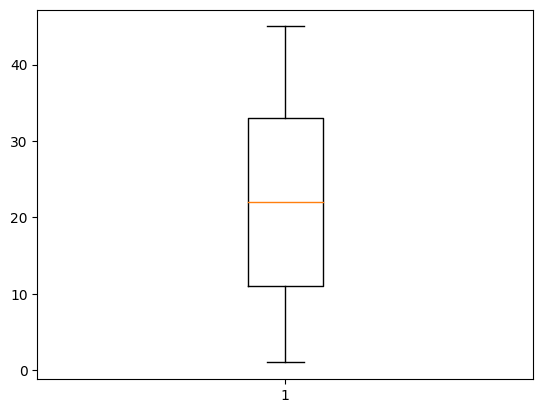

In [52]:
#Store
plt.boxplot(df['Store'] )

# show plot
plt.show()

In [53]:
Q1 = df['Store'].quantile(0.25)
Q3 = df['Store'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound , upper_bound

(-22.0, 66.0)

In [54]:
df.Store = df.Store.clip(lower_bound , upper_bound)

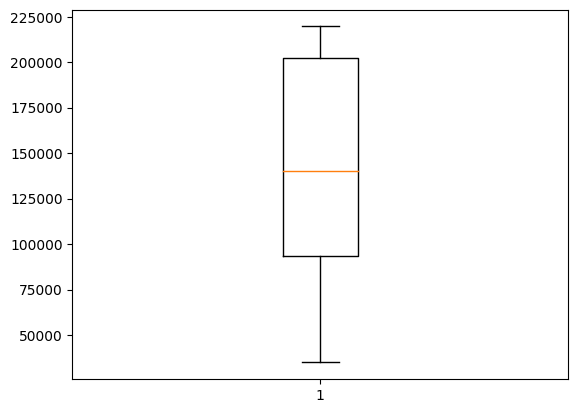

In [55]:
#Size
plt.boxplot(df['Size'] )

# show plot
plt.show()

In [56]:
Q1 = df['Size'].quantile(0.25)
Q3 = df['Size'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound , upper_bound

(-69662.5, 365805.5)

In [57]:
df.Size = df.Size.clip(lower_bound , upper_bound)

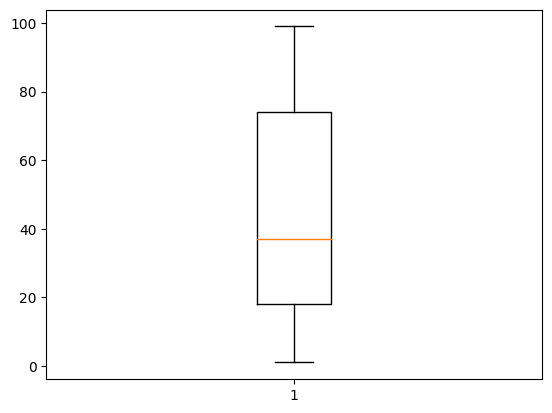

In [58]:
#Dept
plt.boxplot(df['Dept'] )

# show plot
plt.show()

In [59]:
Q1 = df['Dept'].quantile(0.25)
Q3 = df['Dept'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound , upper_bound

(-66.0, 158.0)

In [60]:
df.Dept = df.Dept.clip(lower_bound , upper_bound)

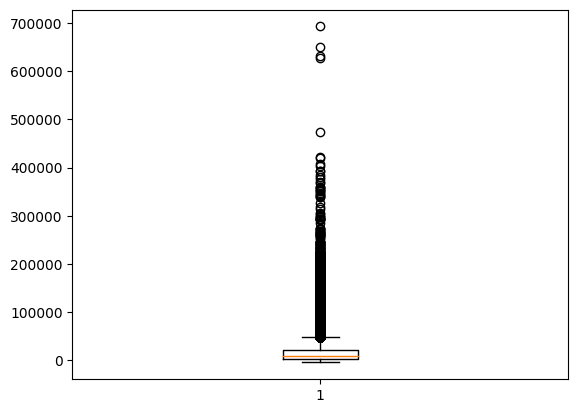

In [61]:
#Weekly_Sales
plt.boxplot(df['Weekly_Sales'] )

# show plot
plt.show()

In [62]:
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound , upper_bound

(-25109.653749999998, 47395.15625)

In [63]:
df.Weekly_Sales = df.Weekly_Sales.clip(lower_bound , upper_bound)

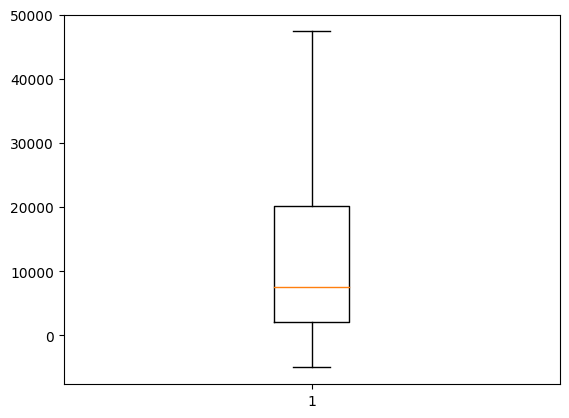

In [64]:
#After Remove Weekly_Sales
plt.boxplot(df['Weekly_Sales'] )

# show plot
plt.show()

# Eda (Exploratary Data Analysis)

In [65]:
#date columns not use for ploting so we should create month,year each columns
df['Month'] = df['Date'].dt.month
df["Year"] = df['Date'].dt.year
df.drop(['Date'],axis=1,inplace=True)
df.tail(2)

,Store,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Month,Year
421568,45,B,118221,58.85,3.882,4018.91,5.5,11.35,211.94,858.33,192.308899,8.667,False,97,6817.48,10,2012
421569,45,B,118221,58.85,3.882,4018.91,5.5,11.35,211.94,858.33,192.308899,8.667,False,98,1076.80,10,2012


In [66]:
# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### All Categorical Columns checking

Text(0, 0.5, 'Frequency')

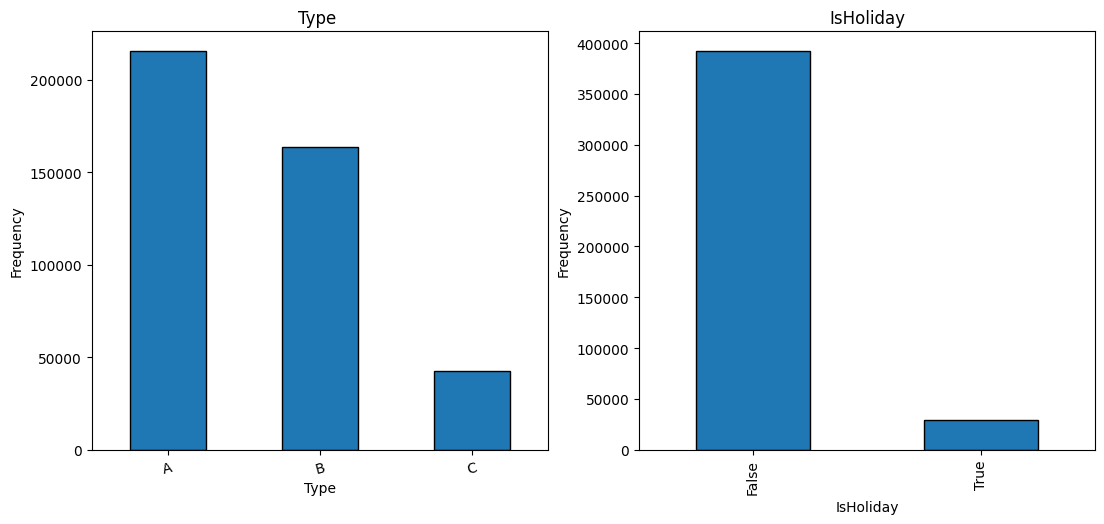

In [67]:
plt.figure(figsize=(20, 25))

plt.subplot(431)
df['Type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Type ')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['IsHoliday'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('IsHoliday')
plt.xlabel('IsHoliday')
plt.ylabel('Frequency')

### Feature Vs Target (Categorical Data )

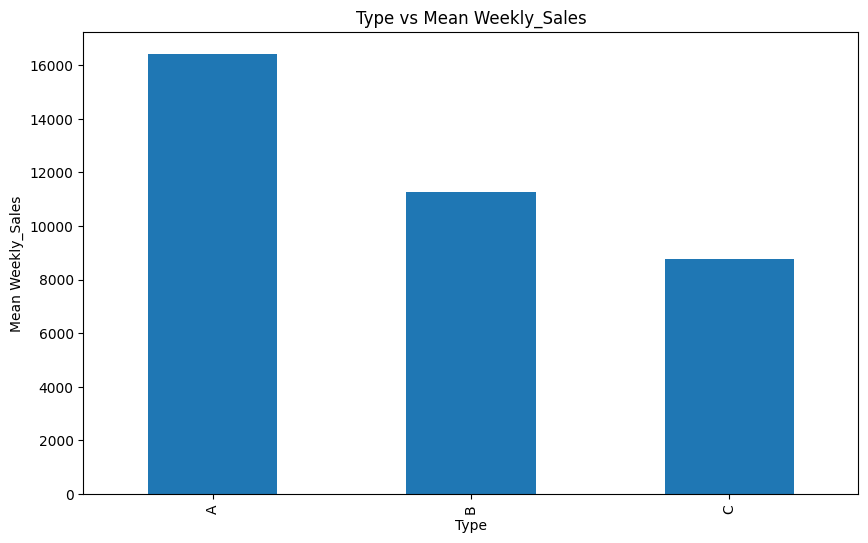

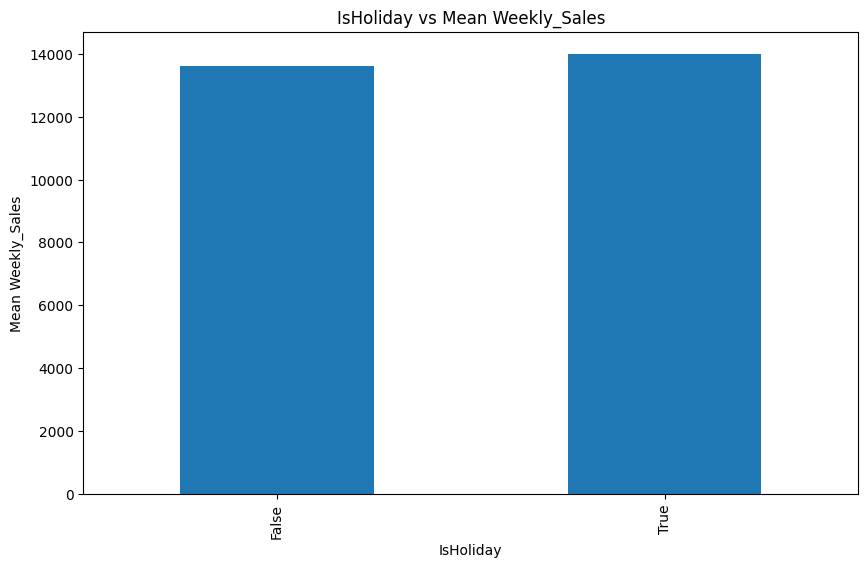

In [68]:
# List of features to plot
features = [
    'Type',
    'IsHoliday'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['Weekly_Sales'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean Weekly_Sales')
    plt.title(f'{feature} vs Mean Weekly_Sales')
    plt.show()

### Feature Vs Target (Condinues Data )

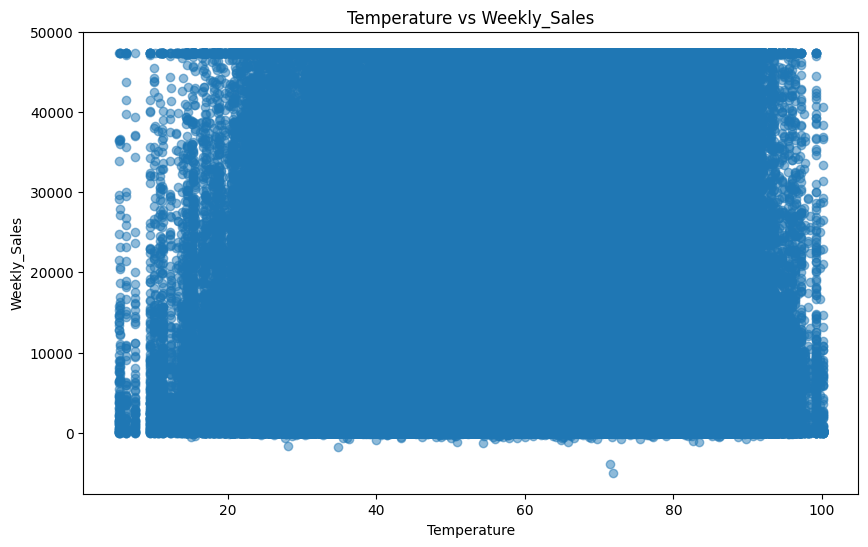

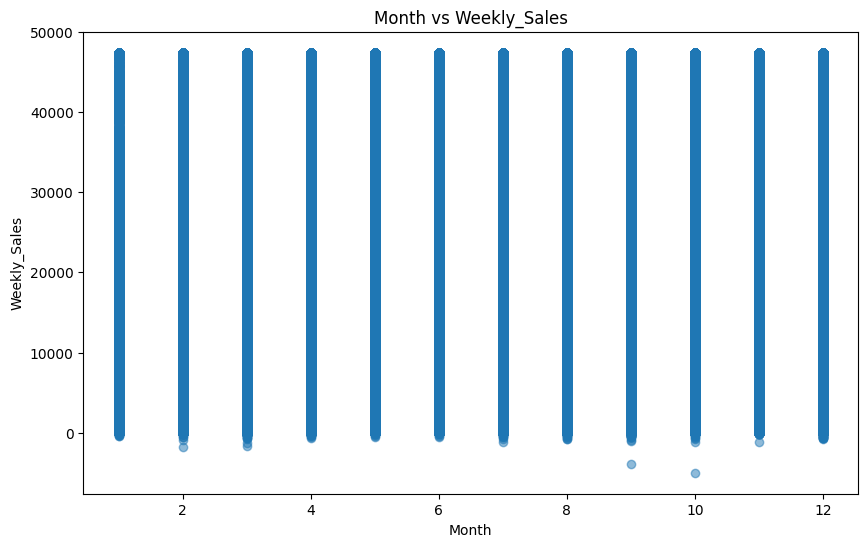

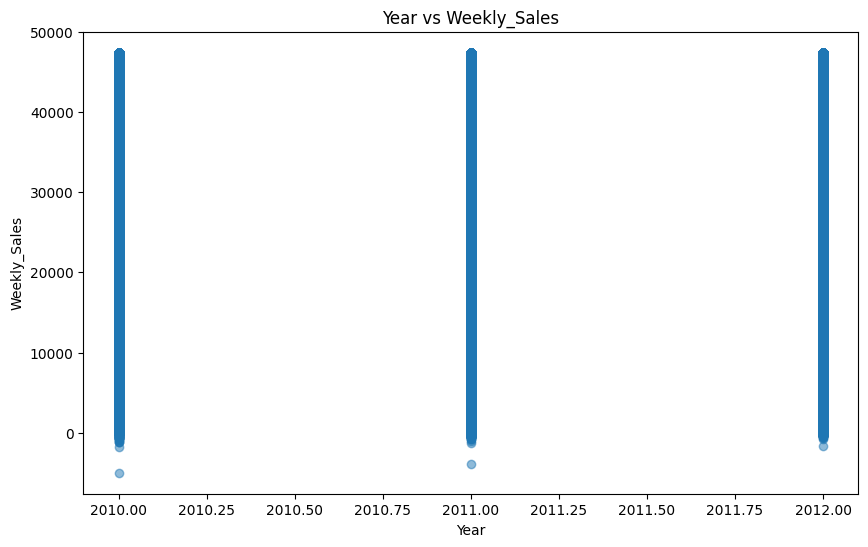

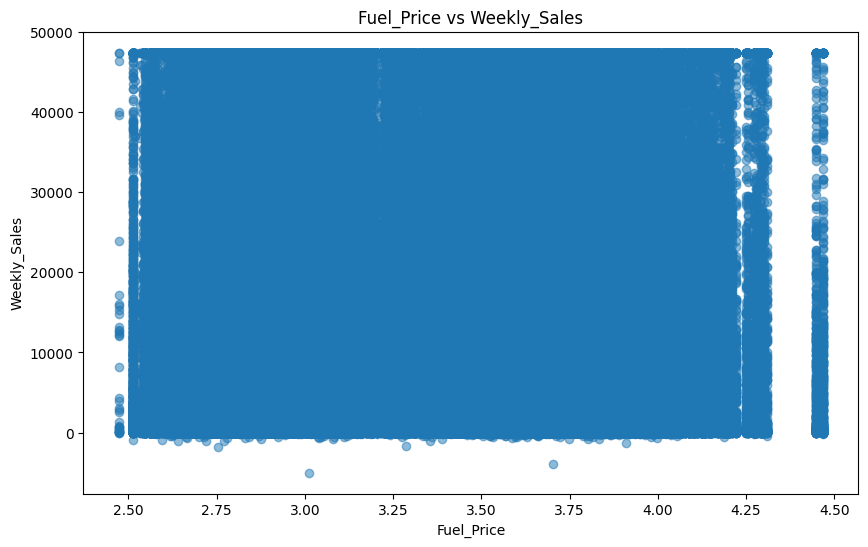

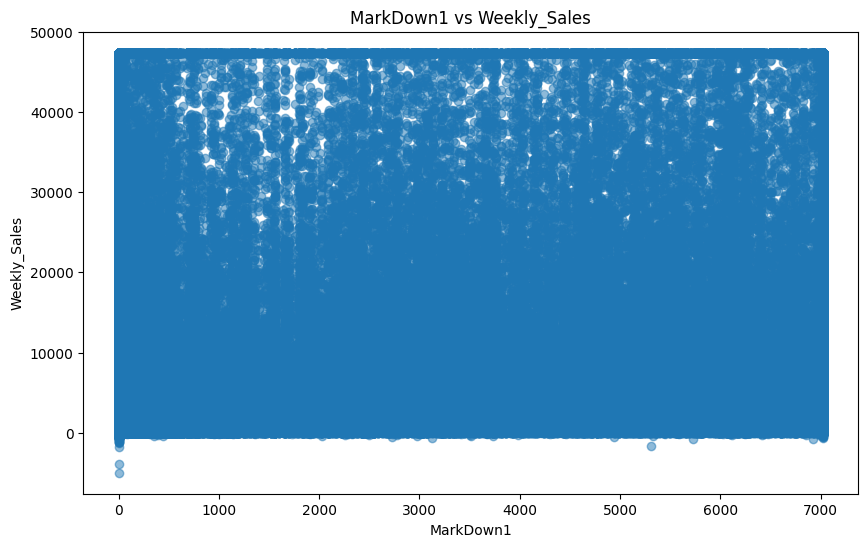

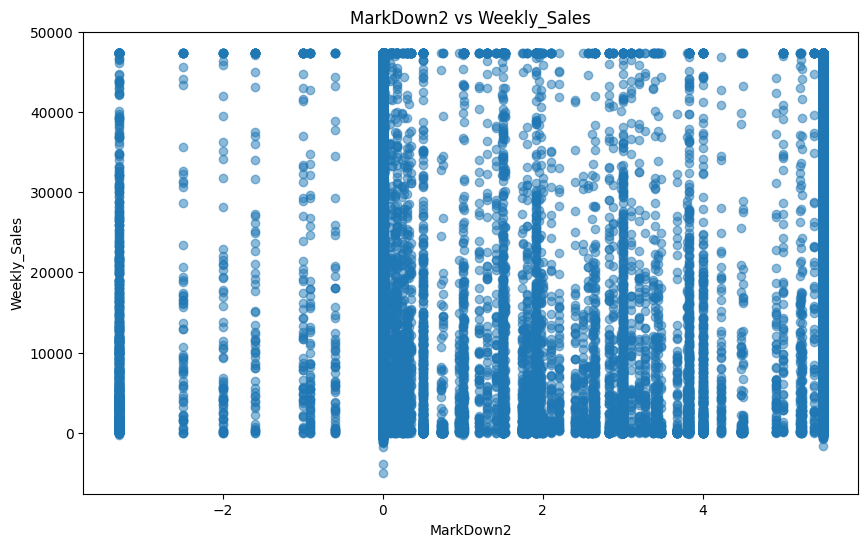

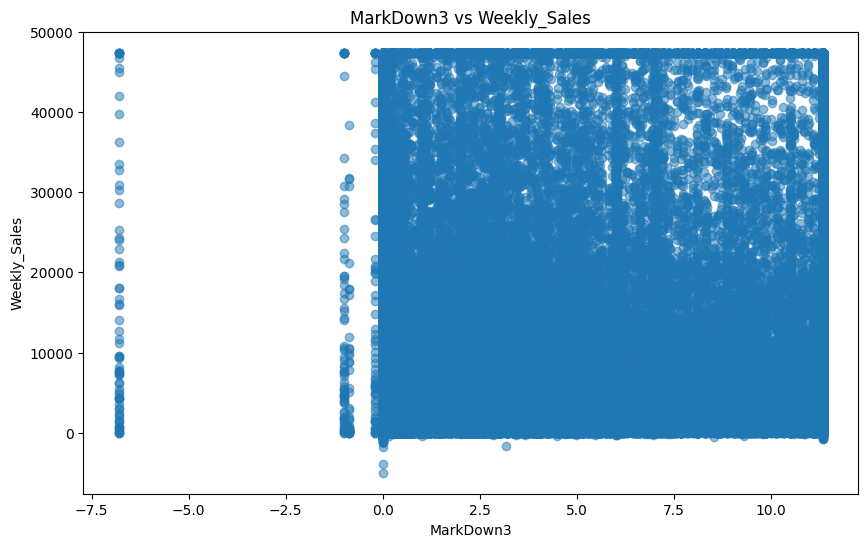

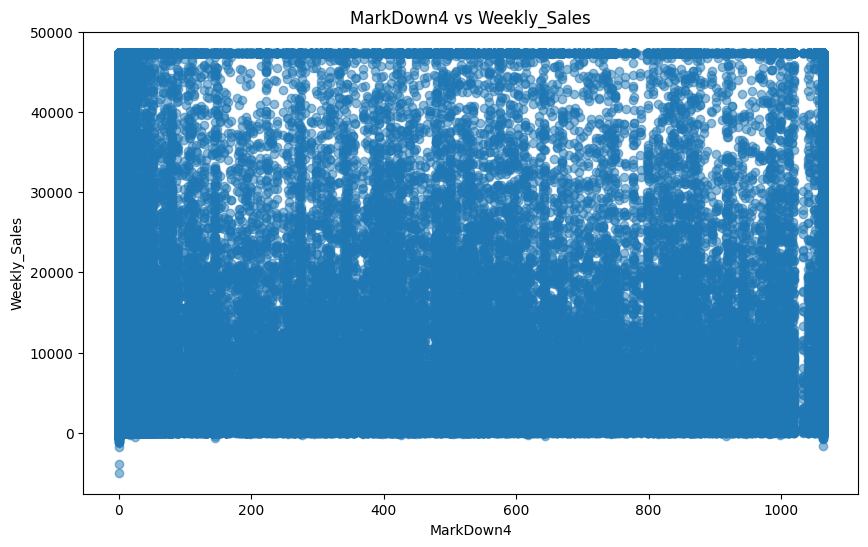

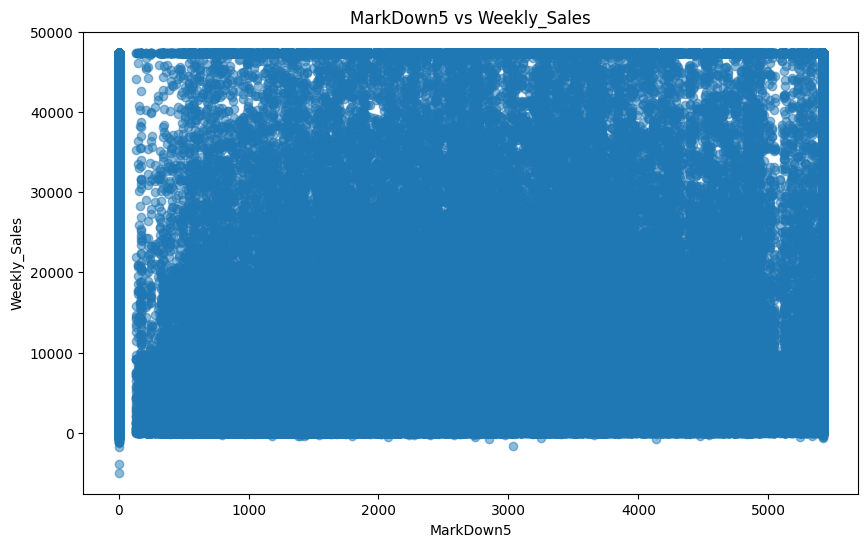

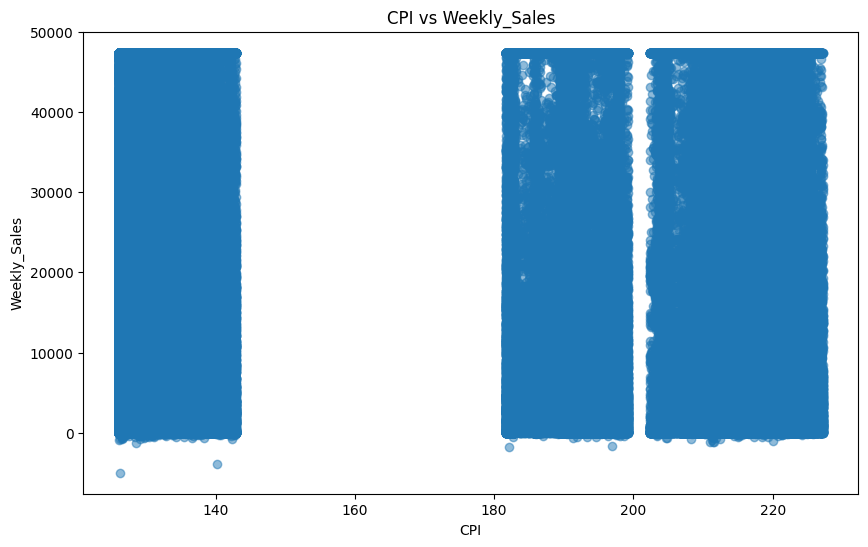

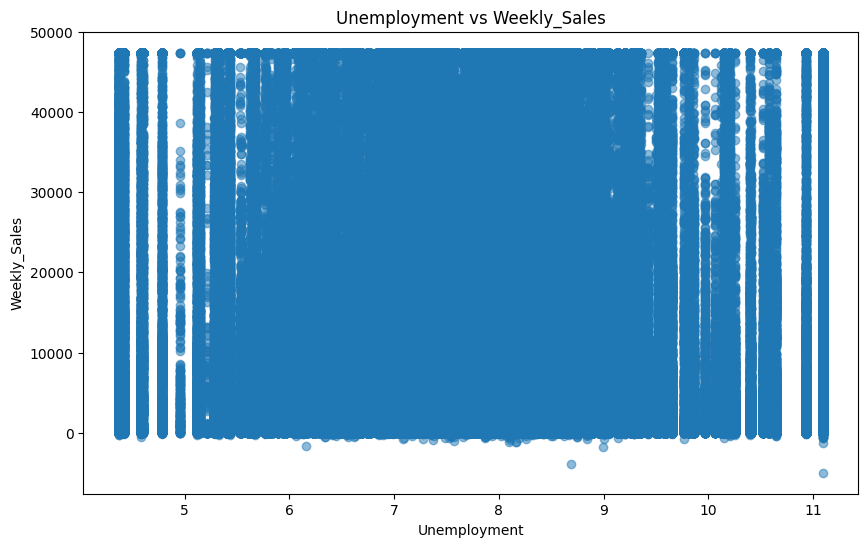

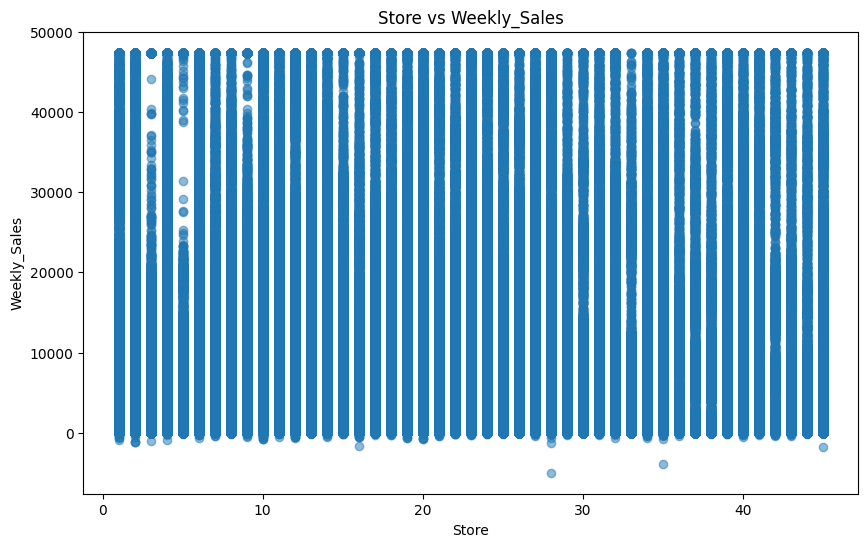

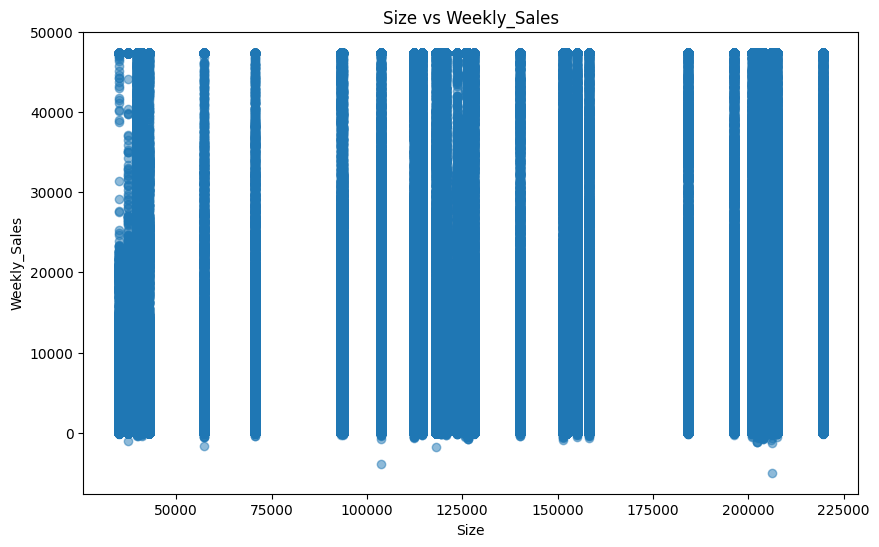

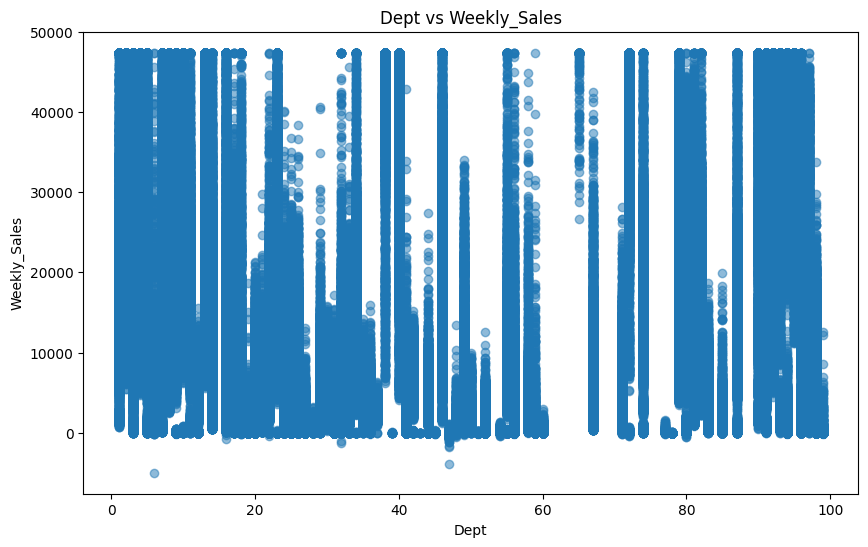

In [71]:
features = [ 'Temperature','Month','Year',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Store', 'Size', 'Dept']
target = 'Weekly_Sales'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

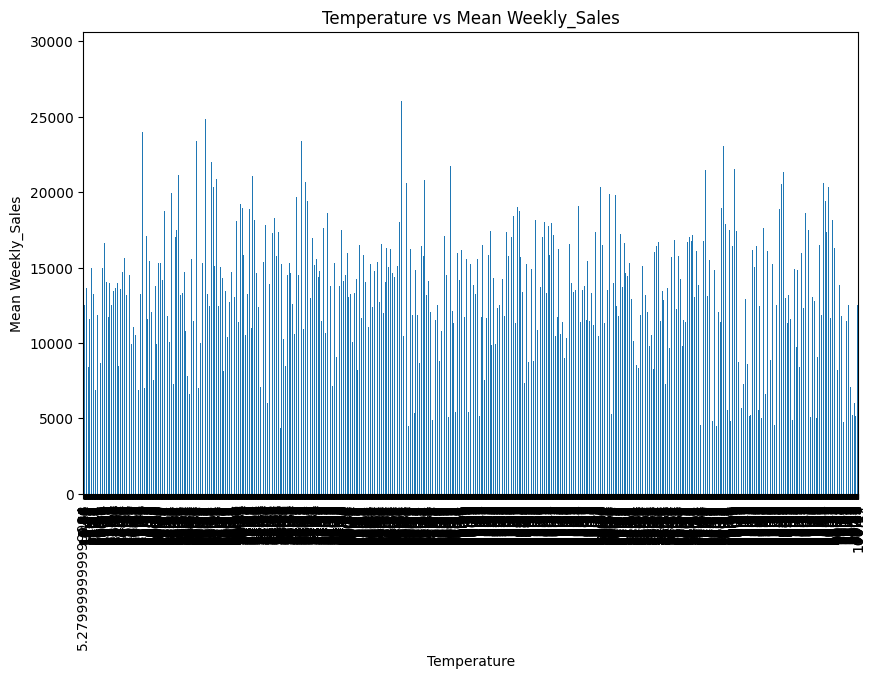

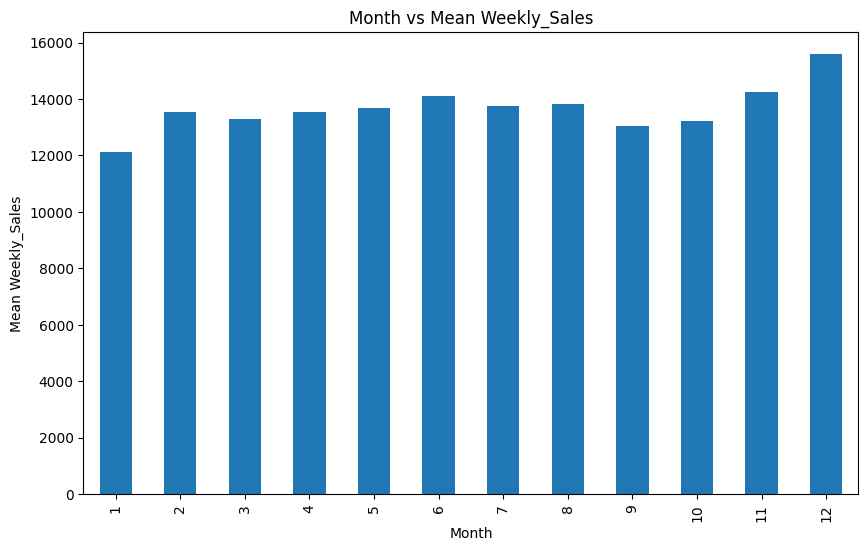

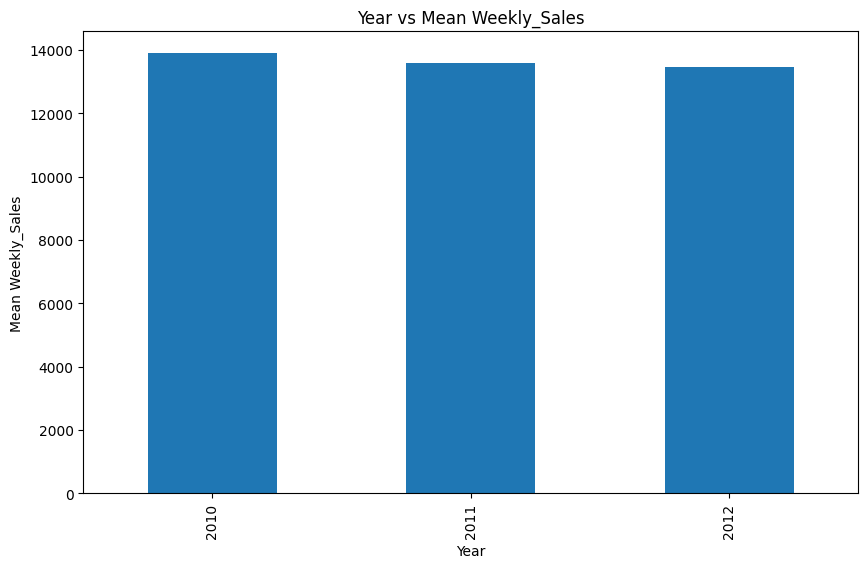

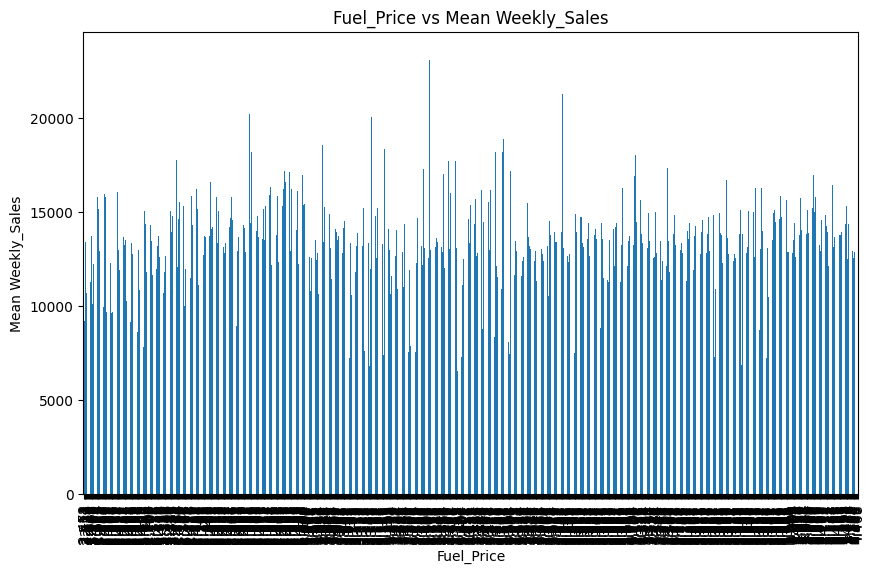

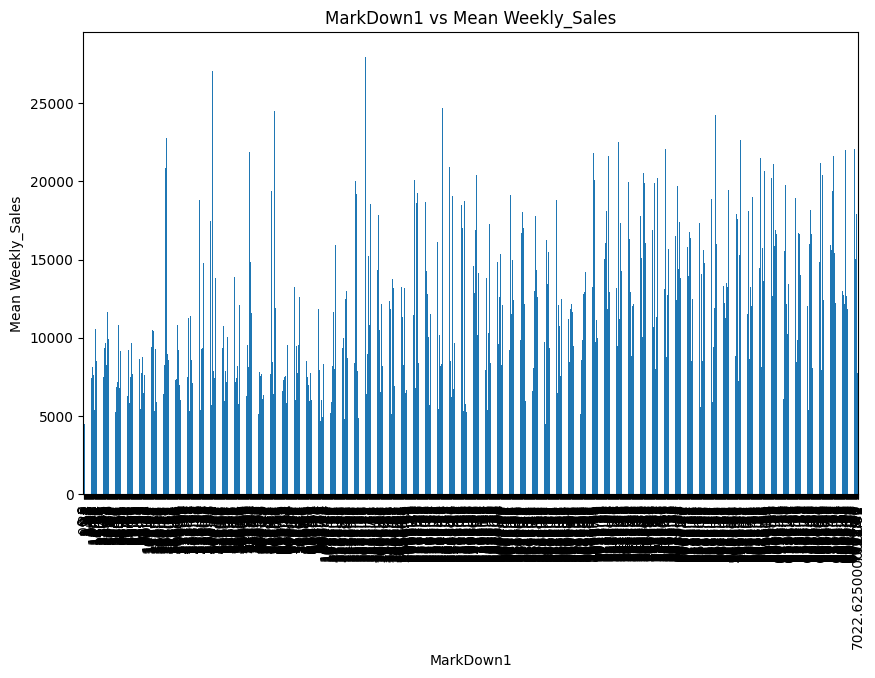

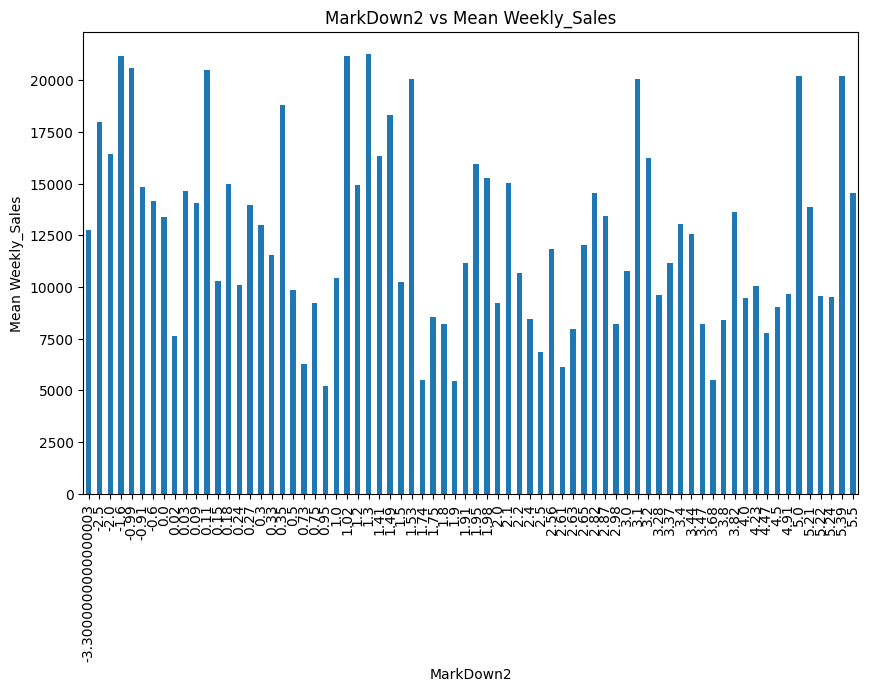

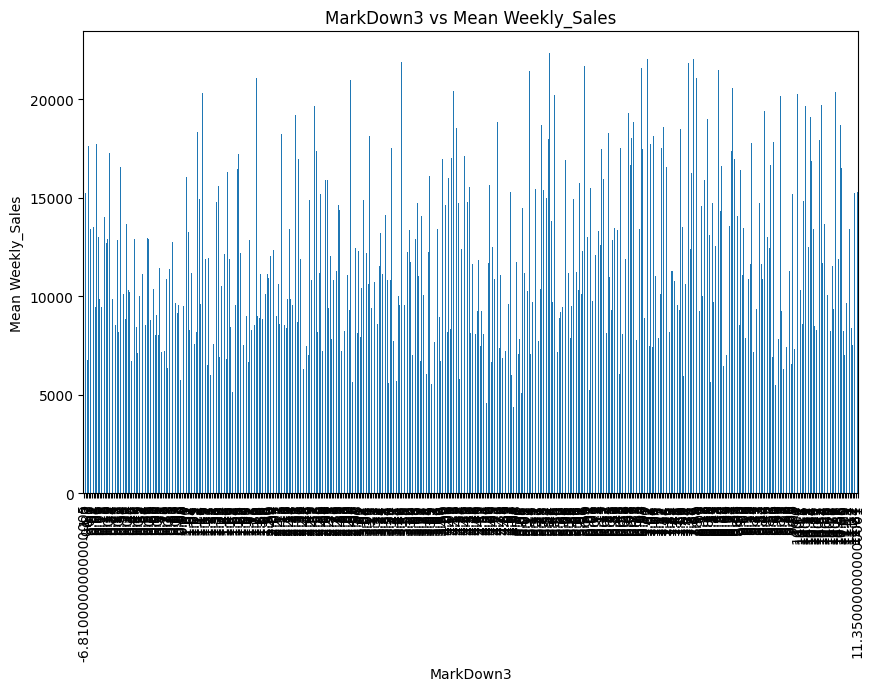

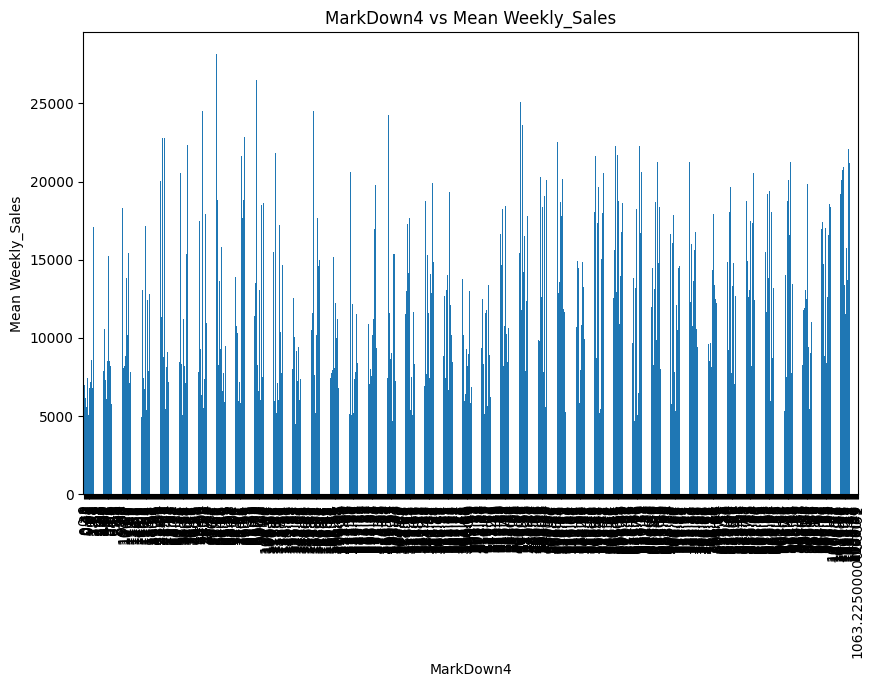

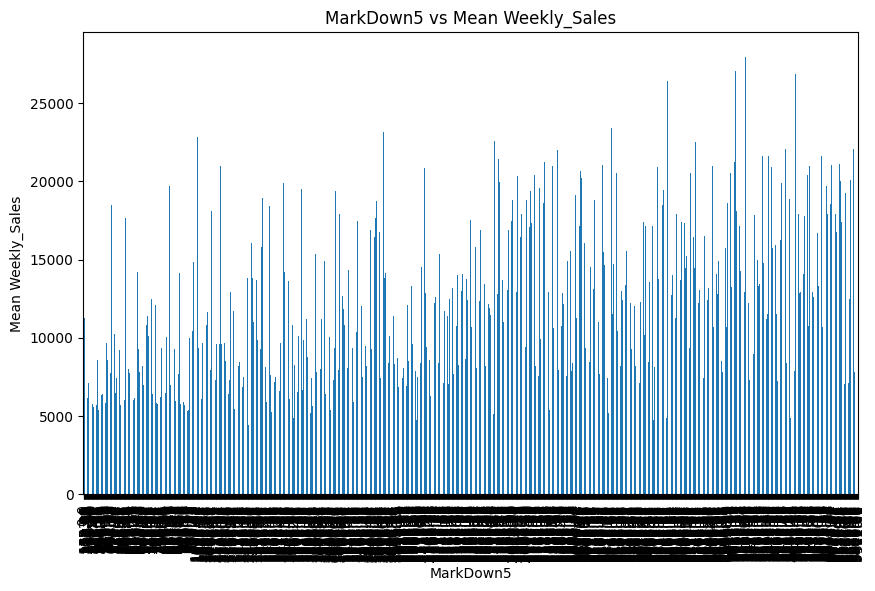

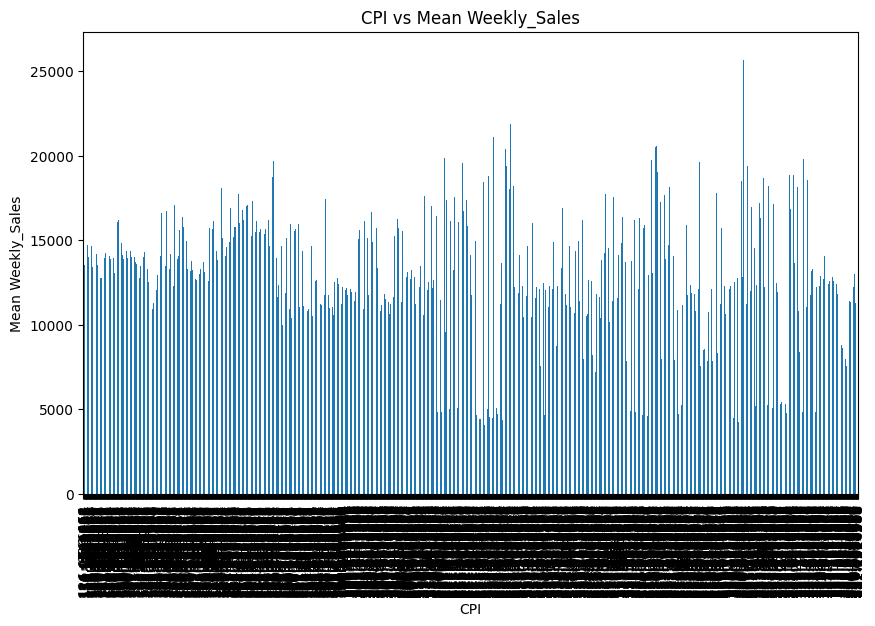

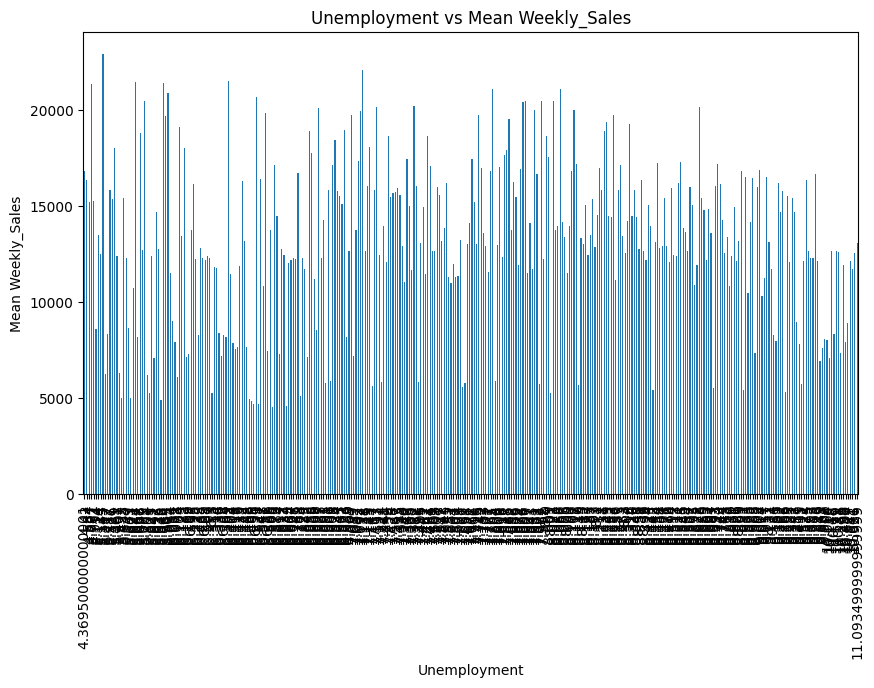

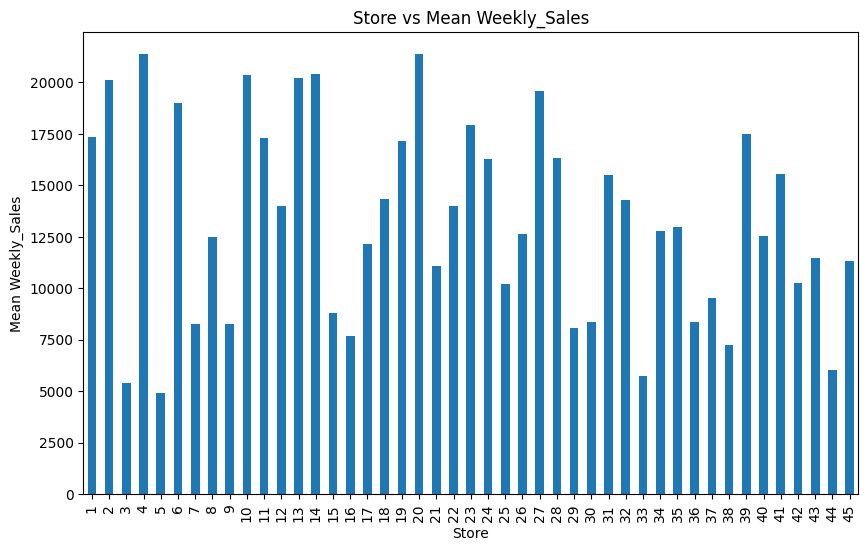

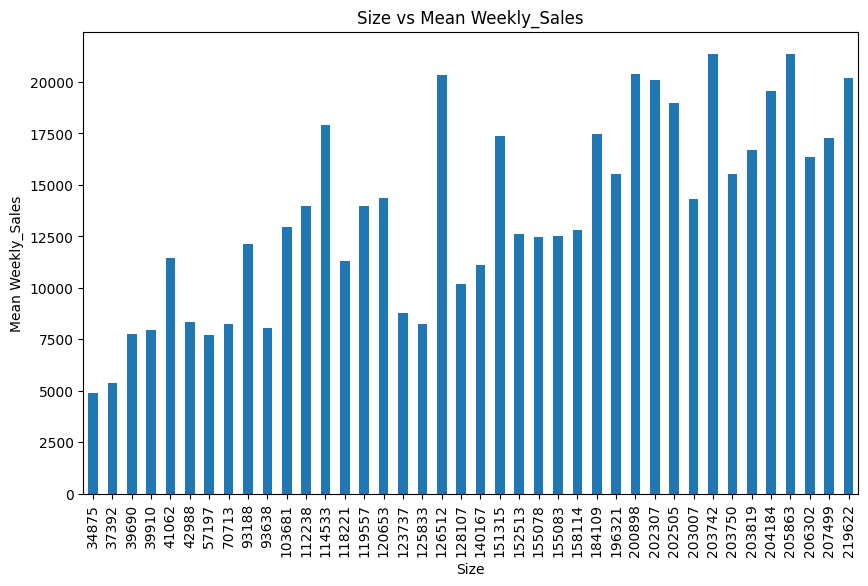

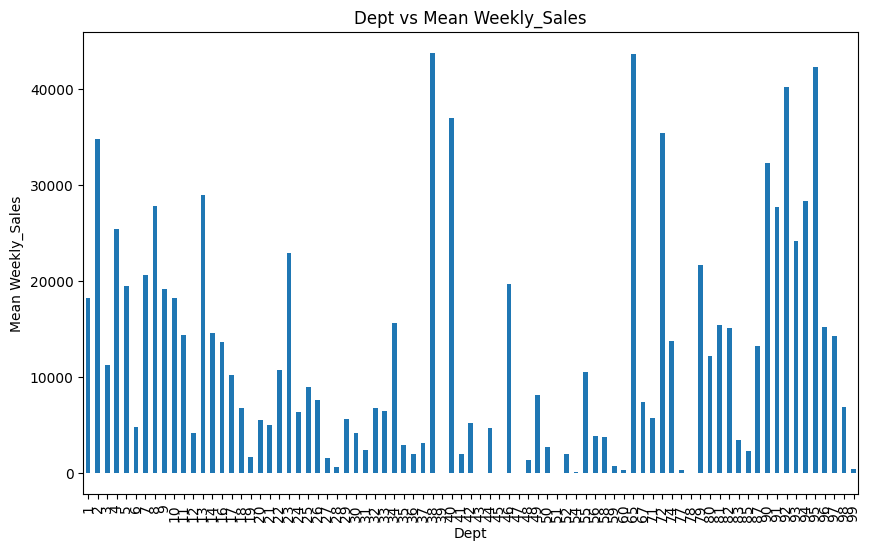

In [69]:
features = [ 'Temperature','Month','Year',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Store', 'Size', 'Dept']
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['Weekly_Sales'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean Weekly_Sales')
    plt.title(f'{feature} vs Mean Weekly_Sales')
    plt.show()

### What should understand on EDA

#### 1.Some columns Not affect in the target variable so we should delete that columns its come better results
#### 2.its not any linear relation in this columns  


In [71]:
#delete Use less columns
del df['Temperature']
del df['Fuel_Price']
del df['MarkDown1']
del df['MarkDown2']
del df['MarkDown3']
del df['MarkDown4']
del df['MarkDown5']
del df['CPI']
del df['Unemployment']

In [72]:
df.head(2)

,Store,Type,Size,IsHoliday,Dept,Weekly_Sales,Month,Year
0,1,A,151315,False,1,24924.50000,2,2010
1,1,A,151315,False,2,47395.15625,2,2010


# Encoding Categorical Variables

In [73]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()

In [74]:
df1=df.copy()

In [75]:
# Define the columns to be encoded with label encoding
ordinal_cols = ['Type','IsHoliday']
for col in ordinal_cols:
    df1[col] = le.fit_transform(df1[col])
df1.tail(2)

,Store,Type,Size,IsHoliday,Dept,Weekly_Sales,Month,Year
421568,45,1,118221,0,97,6817.48,10,2012
421569,45,1,118221,0,98,1076.80,10,2012


# Split

In [76]:
X = df1.drop('Weekly_Sales',axis=1)
y = df1['Weekly_Sales']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=80)

In [77]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(337256, 7) (84314, 7) (337256,) (84314,)


# Scalling

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[ 0.84608759, -0.88542821, -1.59118909, ..., -1.12306599,
         -1.36994932,  1.29294284],
        [ 1.39373492, -0.88542821,  0.30052925, ..., -1.09027822,
          1.0962483 ,  0.03832063],
        [-0.24920705, -0.88542821,  1.09949266, ...,  1.40159229,
         -1.06167462,  0.03832063],
        ...,
        [ 0.53314627,  0.61529033, -0.70678171, ...,  1.4999556 ,
         -0.44512521,  0.03832063],
        [-1.42273703, -0.88542821,  1.13300139, ..., -0.92633937,
         -0.44512521,  1.29294284],
        [ 0.53314627,  0.61529033, -0.70678171, ...,  1.66389445,
          1.404523  , -1.21630157]]),
 array([[-0.09273639,  0.61529033,  0.05600081, ...,  0.31959588,
          0.4796989 , -1.21630157],
        [ 0.29844027, -0.88542821,  0.25839744, ...,  1.33601675,
          0.17142419,  1.29294284],
        [-1.10979571, -0.88542821,  0.30044728, ..., -0.27058397,
         -0.75339991, -1.21630157],
        ...,
        [ 0.6113816 ,  2.11600888, -1.53712266, ..., -

# Building Machine Learning Model

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

### Linear Regression

In [82]:
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)

[15412.98465913 15782.3587799  14168.62953205 ...  6893.90557492
 14138.93062727 12323.05847218]
199334      292.50
255773     1345.05
69494       824.00
300203     2705.89
211825    10743.69
            ...   
298791      192.37
159508    25889.94
288568      662.08
75419       802.46
176516    19271.24
Name: Weekly_Sales, Length: 84314, dtype: float64


In [83]:
linear_model.score(X_test, y_test)

0.0805653351116582

In [84]:
from sklearn.model_selection import cross_val_score
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.08318919646181766

### K Nearest Neighbor Regression

In [93]:
knn_values=np.arange(1,10)
cross_val_knn=[]
for k in knn_values:
  knn_regressor=KNeighborsRegressor(n_neighbors=k)
  knn_regressor.fit(X_train_scaled,y_train)
  print("K value : ", k, " train score : ", knn_regressor.score(X_train_scaled,y_train)  ,"cross_val_score : ", cross_val_score(knn_regressor,X_train_scaled,y_train,cv = 10).mean())
  cross_val_knn.append(cross_val_score(knn_regressor,X_train_scaled,y_train,cv = 10).mean())

K value :  1  train score :  0.9744426380309626 cross_val_score :  0.8388144481867228
K value :  2  train score :  0.9567381161778437 cross_val_score :  0.8291746420940649
K value :  3  train score :  0.9369792307284789 cross_val_score :  0.7625273968196694
K value :  4  train score :  0.8919131878779719 cross_val_score :  0.6827970775061935
K value :  5  train score :  0.8265638961784854 cross_val_score :  0.6190643677593636
K value :  6  train score :  0.7615483933065107 cross_val_score :  0.5804808572861466
K value :  7  train score :  0.7118067861717308 cross_val_score :  0.5590298618895814
K value :  8  train score :  0.6773603083994691 cross_val_score :  0.5456458034733731
K value :  9  train score :  0.6546533900274194 cross_val_score :  0.5350767877307158


In [94]:
cross_val_knn_regressor=max(cross_val_knn)
print("The best K-Value is 1 and Cross_val_score is",cross_val_knn_regressor )

The best K-Value is 1 and Cross_val_score is 0.8388144481867228


In [95]:
knn_regressor=KNeighborsRegressor(n_neighbors=1)
knn_regressor.fit(X_train_scaled,y_train)


KNeighborsRegressor(n_neighbors=1)

In [96]:
cross_val_knn_regressor=cross_val_score(knn_regressor,X_train_scaled,y_train,cv=15).mean()
cross_val_knn_regressor

0.8452914235128514

### Decision Tree Regression

In [86]:
max_depth=np.arange(1,20)
cross_val_dt=[]
for d in max_depth:
  dt_regressor= DecisionTreeRegressor(max_depth=d, random_state=0)
  dt_regressor.fit(X_train,y_train)
  print("Depth : ", d, " train Score  : ", dt_regressor.score(X_train,y_train), "cross_val_score : ", cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())
  cross_val_dt.append(cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())

Depth :  1  train Score  :  0.10081464502184478 cross_val_score :  0.10075786709046915
Depth :  2  train Score  :  0.22088991479111963 cross_val_score :  0.22084425638738656
Depth :  3  train Score  :  0.3457699072368645 cross_val_score :  0.34570724799770775
Depth :  4  train Score  :  0.4229777195958938 cross_val_score :  0.4229098405713131
Depth :  5  train Score  :  0.5262828938057864 cross_val_score :  0.5260143803764732
Depth :  6  train Score  :  0.6663904567080474 cross_val_score :  0.6658192270514016
Depth :  7  train Score  :  0.7272940499420231 cross_val_score :  0.7280467211254715
Depth :  8  train Score  :  0.7734595337849552 cross_val_score :  0.7719220198231442
Depth :  9  train Score  :  0.8221476617485859 cross_val_score :  0.8206686276757887
Depth :  10  train Score  :  0.8699009016132555 cross_val_score :  0.867808617892835
Depth :  11  train Score  :  0.898139028870501 cross_val_score :  0.896094466288227
Depth :  12  train Score  :  0.9218433032247474 cross_val_sco

In [88]:
cross_val_dt_regressor=max(cross_val_dt)
print("The best depth is 19 and Cross_val_score is:",cross_val_dt_regressor)

The best depth is 19 and Cross_val_score is: 0.9689717600881906


In [89]:
dt_regressor=DecisionTreeRegressor(max_depth=19, random_state=0)
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=19, random_state=0)

In [90]:
cross_val_dt_regressor=cross_val_score(dt_regressor,X_train,y_train,cv=10).mean()
cross_val_dt_regressor

0.9689717600881906

###  Random Forest Regression

In [101]:
max_depth=np.array([2,4,8,10,11,12,13,15,18,20])
cross_val_rf=[]
for d in max_depth:
  rf_regressor=RandomForestRegressor(max_depth=d, random_state=0)
  rf_regressor.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())
  cross_val_rf.append(cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())

Depth :  2 cross_val_score :  0.22116777462786022
Depth :  4 cross_val_score :  0.42603685724838175
Depth :  8 cross_val_score :  0.7872342927974246
Depth :  10 cross_val_score :  0.8846868182967639
Depth :  11 cross_val_score :  0.9116955892490085
Depth :  12 cross_val_score :  0.9323971834031212
Depth :  13 cross_val_score :  0.9484661814130919
Depth :  15 cross_val_score :  0.9652330462903732
Depth :  18 cross_val_score :  0.973238450517938
Depth :  20 cross_val_score :  0.9740420415100933


In [102]:
cross_val_rf_regressor=max(cross_val_rf)
print("The best depth is 20 and Cross_val_score is:",cross_val_rf_regressor)

The best depth is 20 and Cross_val_score is: 0.9740420415100933


In [103]:
rf_regressor=RandomForestRegressor(max_depth=20, random_state=0)
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, random_state=0)

In [104]:
cross_val_rf_regressor=cross_val_score(rf_regressor,X_train,y_train,cv=15).mean()
cross_val_rf_regressor

0.9740420415100933

### Extreme Gradient Boosting Regression

In [97]:
cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
  xgb_regressor= xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
  xgb_regressor.fit(X_train,y_train)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.6005107188940705
Learning rate :  0.05 cross_val_score: 0.8550073814555883
Learning rate :  0.08 cross_val_score: 0.8933381239884607
Learning rate :  0.1 cross_val_score: 0.9067986577769318
Learning rate :  0.2 cross_val_score: 0.9392357719568862
Learning rate :  0.25 cross_val_score: 0.9457988274900276
Learning rate :  0.3 cross_val_score: 0.9509003090191297


In [98]:
cross_val_xgb_regressor=max(cross_val_xgb)
print("The best Learning rate is 0.3 and Cross_val_score is:",cross_val_xgb_regressor)

The best Learning rate is 0.3 and Cross_val_score is: 0.9509003090191297


In [99]:
xgb_regressor= xgb.XGBRegressor(learning_rate =0.3,n_estimators=100) # initialise the model
xgb_regressor.fit(X_train,y_train) #train the model


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [100]:
cross_val_xgb_regressor=cross_val_score(xgb_regressor,X_train,y_train,cv=15).mean()
cross_val_xgb_regressor

0.9509003090191297

### Best Machine Learn Model

In [105]:
print("Cross Validation Score for Linear Regression Model:",cross_val_linear_model)
print("Cross Validation Score for K-Nearest Neighbors Regression Model:",cross_val_knn_regressor)
print("Cross Validation Score for Decision Tree Regression Model: ",cross_val_dt_regressor)
print("Cross Validation Score for Random Forest Regression Model: ",cross_val_rf_regressor)
print("Cross Validation Score for Extreme-Gradient Boosting Regression Model: ",cross_val_xgb_regressor)

Cross Validation Score for Linear Regression Model: 0.08318919646181766
Cross Validation Score for K-Nearest Neighbors Regression Model: 0.8452914235128514
Cross Validation Score for Decision Tree Regression Model:  0.9689717600881906
Cross Validation Score for Random Forest Regression Model:  0.9740420415100933
Cross Validation Score for Extreme-Gradient Boosting Regression Model:  0.9509003090191297


# R2 Score

In [106]:
from sklearn.metrics import r2_score

In [107]:
y_pred_lr=linear_model.predict(X_test)
y_pred_knn=knn_regressor.predict(X_test)
y_pred_dt= dt_regressor.predict(X_test)
y_pred_rf=rf_regressor.predict(X_test)
y_pred_xgb=xgb_regressor.predict(X_test)

In [108]:
R2_score_lr=r2_score(y_test,y_pred_lr)
R2_score_knn=r2_score(y_test,y_pred_knn)
R2_score_dt=r2_score(y_test,y_pred_dt)
R2_score_rf=r2_score(y_test,y_pred_rf)
R2_score_xgb=r2_score(y_test,y_pred_xgb)

In [109]:
print("R2 Score for Linear Regression Model:",R2_score_lr)
print("R2 Score for K-Nearest Neighbors Regression Model:",R2_score_knn)
print("R2 Score for Decision Tree Regression Model: ",R2_score_dt)
print("R2 Score for Random Forest Regression Model: ",R2_score_rf)
print("R2 Score for Extreme-Gradient Boosting Regression Model: ",R2_score_xgb)

R2 Score for Linear Regression Model: 0.0805653351116582
R2 Score for K-Nearest Neighbors Regression Model: -0.794557058740248
R2 Score for Decision Tree Regression Model:  0.970014448933141
R2 Score for Random Forest Regression Model:  0.9737151566661246
R2 Score for Extreme-Gradient Boosting Regression Model:  0.9500740245510259


In [110]:
print(y_pred_rf)

[  281.23259132  1722.42254624   830.69447486 ...   703.22707726
  1203.38551223 17063.33414263]


# Suggestion

In [114]:
rf_regressor.feature_importances_

array([0.05967804, 0.02284611, 0.216023  , 0.00303333, 0.66147644,
       0.03170757, 0.00523552])

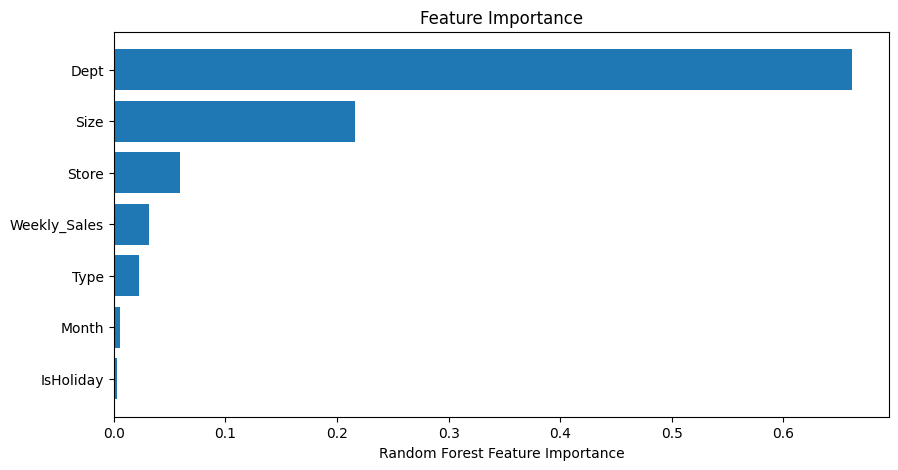

In [115]:
sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

Based on the **feature importance** given by Best Machine Learning
Algorith m(*Random Forestg**)-Sellers should Focus on the features of order given below to build homes that fetch more mone
#### 1.Department 
#### 2.Size
#### 3.store
#### 4.type Facility,